In [3]:
import pandas as pd
import numpy as np
from sklearn import naive_bayes
from sklearn import model_selection
from sklearn import metrics

In [28]:
extracted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fg            1340 non-null   float64
 1   3p            1340 non-null   float64
 2   ft            1340 non-null   float64
 3   reb           1340 non-null   float64
 4   ast           1340 non-null   float64
 5   stl           1340 non-null   float64
 6   blk           1340 non-null   float64
 7   tov           1340 non-null   float64
 8   target_5yrs   1340 non-null   int64  
 9   total_points  1340 non-null   float64
 10  efficiency    1340 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 115.3 KB


In [29]:
extracted_data.describe()

,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,44.169403,19.149627,70.300299,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149,451.783358,22.813310
std,6.137679,16.051861,10.578479,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531,366.520093,9.587906
min,23.800000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000,14.700000,2.278481
25%,40.200000,0.000000,64.700000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000,172.800000,15.811873
50%,44.100000,22.200000,71.250000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000,338.350000,21.949142
75%,47.900000,32.500000,77.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000,639.675000,28.924390
max,73.700000,100.000000,100.000000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000,2312.400000,60.375979


In [5]:
extracted_data = pd.read_csv('extracted_nba_players.csv')

In [6]:
extracted_data.head(10)



,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,9.722628
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,9.368030
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,25.150327
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,28.500000
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,18.782609
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,0,277.5,24.342105
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,1,409.2,37.541284
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,1,273.6,26.563107
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,0,156.0,15.757576
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,0,155.4,18.282353


In [13]:
y=extracted_data['target_5yrs']
X=extracted_data.drop('target_5yrs',axis=1)

In [14]:
y.head(10)


0    0
1    0
2    0
3    1
4    1
5    0
6    1
7    1
8    0
9    0
Name: target_5yrs, dtype: int64

**Question:** What do you observe about the your target variable?


Binary values so it requires model for binary classification

In [15]:
X.head(10)

,fg,3p,ft,reb,ast,stl,blk,tov,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,266.4,9.722628
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,252.0,9.368030
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,384.8,25.150327
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,330.6,28.500000
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,216.0,18.782609
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,277.5,24.342105
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,409.2,37.541284
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,273.6,26.563107
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,156.0,15.757576
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,155.4,18.282353


In [30]:
X.describe()

,fg,3p,ft,reb,ast,stl,blk,tov,total_points,efficiency
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,44.169403,19.149627,70.300299,3.034478,1.550522,0.618507,0.368582,1.193582,451.783358,22.813310
std,6.137679,16.051861,10.578479,2.057774,1.471169,0.409759,0.429049,0.722541,366.520093,9.587906
min,23.800000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.100000,14.700000,2.278481
25%,40.200000,0.000000,64.700000,1.500000,0.600000,0.300000,0.100000,0.700000,172.800000,15.811873
50%,44.100000,22.200000,71.250000,2.500000,1.100000,0.500000,0.200000,1.000000,338.350000,21.949142
75%,47.900000,32.500000,77.600000,4.000000,2.000000,0.800000,0.500000,1.500000,639.675000,28.924390
max,73.700000,100.000000,100.000000,13.900000,10.600000,2.500000,3.900000,4.400000,2312.400000,60.375979


**Question:** What do you observe about the your predictor variables?

continous data so it requires model with continuous features

In [17]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)

In [22]:
nb=naive_bayes.GaussianNB()
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)

In [23]:
print('accuracy score:'), print(metrics.accuracy_score(y_test, y_pred))
print('precision score:'), print(metrics.precision_score(y_test, y_pred))
print('recall score:'), print(metrics.recall_score(y_test, y_pred))
print('f1 score:'), print(metrics.f1_score(y_test, y_pred))

accuracy score:
0.6985074626865672
precision score:
0.8211920529801324
recall score:
0.6262626262626263
f1 score:
0.7106017191977076


(None, None)

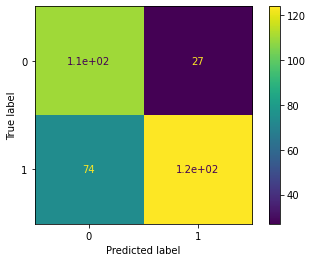

In [27]:
cm=metrics.confusion_matrix(y_test,y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot()